In [2]:
from Procces.data_ingestion import *
from Eda.eda_data import *
from Procces.feature_selection import *
from Procces.preproces import *
from Procces.clean_data import *
from Model import *
from sklearn.model_selection import train_test_split, cross_val_score


In [3]:
data = load_data("../Data/train_colleage.csv")

Data loaded successfully: (1460, 81)


In [4]:
data_information(data)

Data Shape:
(1460, 81)
Data Describe:
                Id  BuildingCategory  ...     SaleYear  OutcomeVariable
count  1460.000000       1460.000000  ...  1460.000000      1460.000000
mean    730.500000         56.897260  ...  2007.815753    180921.195890
std     421.610009         42.300571  ...     1.328095     79442.502883
min       1.000000         20.000000  ...  2006.000000     34900.000000
25%     365.750000         20.000000  ...  2007.000000    129975.000000
50%     730.500000         50.000000  ...  2008.000000    163000.000000
75%    1095.250000         70.000000  ...  2009.000000    214000.000000
max    1460.000000        190.000000  ...  2010.000000    755000.000000

[8 rows x 38 columns]
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      1460 non-null   int64  
 1   BuildingC

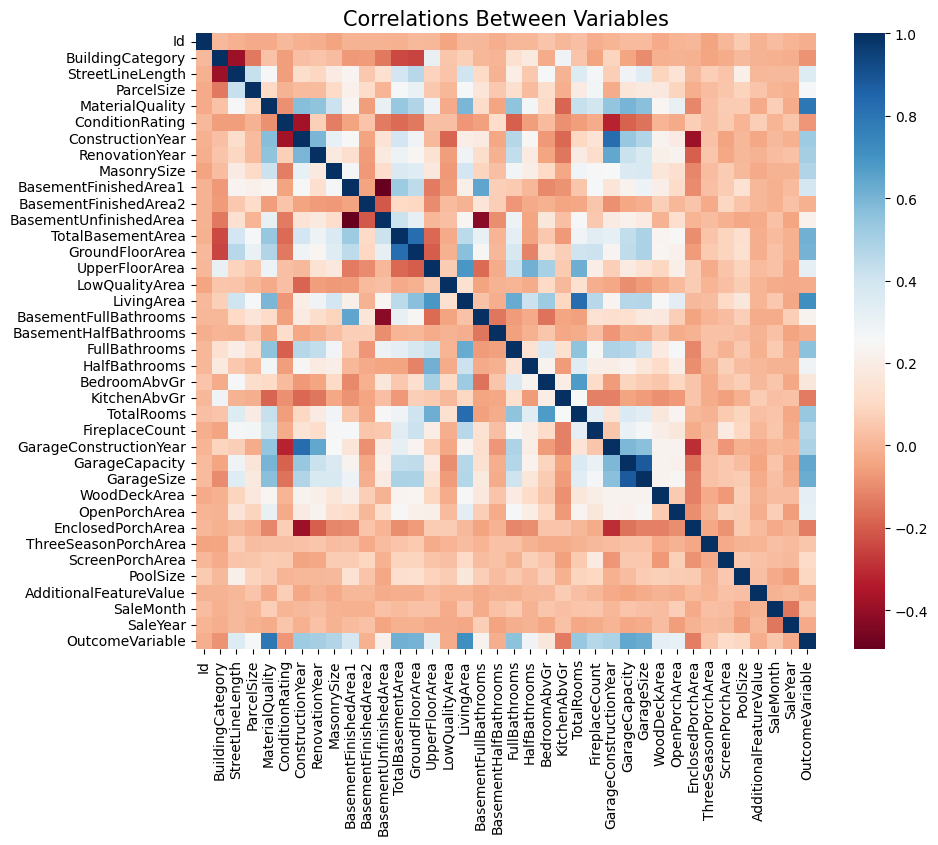

In [6]:
feature_connection(data)

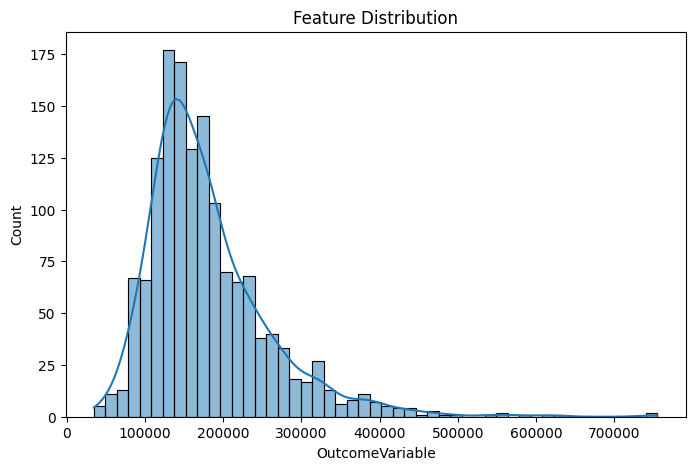

Skewness: 1.882876
Kurtosis: 6.536282


In [7]:
distributed_feature(data['OutcomeVariable'])

In [8]:
missing_data = NullInEachFeature(data)
missing_data.head(20)

,Total,Percent
PoolQuality,1453,0.995205
AdditionalFeature,1406,0.963014
AlleyAccessType,1369,0.937671
FenceQuality,1179,0.807534
MasonryType,872,0.597260
FireplaceQuality,690,0.472603
StreetLineLength,259,0.177397
GarageQuality,81,0.055479
GarageInterior,81,0.055479
GarageLocation,81,0.055479


In [9]:
df_clean = DropTotal(data,missing_data)
print("Missing Values by Column")
print("-"*30)
print(df_clean.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df_clean.isna().sum().sort_values(ascending=False))

Missing Values by Column
------------------------------
Id                        0
BuildingCategory          0
ZoningClassification      0
StreetLineLength        259
ParcelSize                0
                       ... 
SaleMonth                 0
SaleYear                  0
SaleType                  0
SaleCondition             0
OutcomeVariable           0
Length: 75, dtype: int64
------------------------------
TOTAL MISSING VALUES: StreetLineLength          259
GarageConstructionYear     81
GarageQuality              81
GarageCondition            81
GarageLocation             81
                         ... 
SaleMonth                   0
SaleYear                    0
SaleType                    0
SaleCondition               0
OutcomeVariable             0
Length: 75, dtype: int64


In [10]:
data_X ,  Target_Y = dataTarget(df_clean)

In [11]:
numeric_col , categoric_col= split_to_category(data_X)


In [12]:
fill_null_train(data_X,numeric_col,categoric_col)

In [13]:
data_one_hot = one_hot(data_X,categoric_col)

In [14]:
standard_scallar(data_one_hot,numeric_col)

In [15]:
data_one_hot.head()

,Id,BuildingCategory,StreetLineLength,ParcelSize,MaterialQuality,ConditionRating,ConstructionYear,RenovationYear,MasonrySize,BasementFinishedArea1,BasementFinishedArea2,BasementUnfinishedArea,TotalBasementArea,GroundFloorArea,UpperFloorArea,LowQualityArea,LivingArea,BasementFullBathrooms,BasementHalfBathrooms,FullBathrooms,HalfBathrooms,BedroomAbvGr,KitchenAbvGr,TotalRooms,FireplaceCount,GarageConstructionYear,GarageCapacity,GarageSize,WoodDeckArea,OpenPorchArea,EnclosedPorchArea,ThreeSeasonPorchArea,ScreenPorchArea,PoolSize,AdditionalFeatureValue,SaleMonth,SaleYear,ZoningClassification_C (all),ZoningClassification_FV,ZoningClassification_RH,...,FunctionalityRating_Mod,FunctionalityRating_Sev,FunctionalityRating_Typ,GarageLocation_2Types,GarageLocation_Attchd,GarageLocation_Basment,GarageLocation_BuiltIn,GarageLocation_CarPort,GarageLocation_Detchd,GarageInterior_Fin,GarageInterior_RFn,GarageInterior_Unf,GarageQuality_Ex,GarageQuality_Fa,GarageQuality_Gd,GarageQuality_Po,GarageQuality_TA,GarageCondition_Ex,GarageCondition_Fa,GarageCondition_Gd,GarageCondition_Po,GarageCondition_TA,DrivewayType_N,DrivewayType_P,DrivewayType_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730865,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.017598,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,False,False,False,...,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
1,-1.728492,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.107927,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,False,False,False,...,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
2,-1.726120,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.934226,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,False,False,False,...,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
3,-1.723747,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.809167,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,False,False,False,...,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
4,-1.721374,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,1.299326,1.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data_one_hot, Target_Y, test_size=0.2, random_state=42)

In [ ]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])